In [1]:
import numpy as np
import pandas as pd
import datetime
import pickle

In [2]:
# !pip install lxml4
# !pip install html5lib

In [3]:
df = pd.read_csv("Dataset/Weather.csv", index_col = 'DATE')
df.drop("Unnamed: 0",axis=1, inplace = True)
df.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19287 entries, 1970-01-01 to 2022-10-21
Data columns (total 44 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  19287 non-null  object 
 1   NAME     19287 non-null  object 
 2   ACMH     9615 non-null   float64
 3   ACSH     9616 non-null   float64
 4   AWND     14171 non-null  float64
 5   FMTM     10124 non-null  float64
 6   PGTM     12269 non-null  float64
 7   PRCP     19287 non-null  float64
 8   SNOW     19287 non-null  float64
 9   SNWD     19285 non-null  float64
 10  TAVG     6164 non-null   float64
 11  TMAX     19287 non-null  int64  
 12  TMIN     19287 non-null  int64  
 13  TSUN     31 non-null     float64
 14  WDF1     9611 non-null   float64
 15  WDF2     9669 non-null   float64
 16  WDF5     9586 non-null   float64
 17  WDFG     5121 non-null   float64
 18  WDFM     1 non-null      float64
 19  WESD     6071 non-null   float64
 20  WSF1     9614 non-null   float64
 21  WSF

In [5]:
null_data = df.isna().sum()/df.shape[0]
null_data

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [6]:
columns = df.columns[null_data < 0.05]
columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [7]:
df = df[columns].copy()
df

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [8]:
df.ffill(inplace = True)

In [9]:
df.isna().sum()

STATION    0
NAME       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
dtype: int64

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['station', 'name', 'prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19287 entries, 1970-01-01 to 2022-10-21
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19287 non-null  object 
 1   name     19287 non-null  object 
 2   prcp     19287 non-null  float64
 3   snow     19287 non-null  float64
 4   snwd     19287 non-null  float64
 5   tmax     19287 non-null  int64  
 6   tmin     19287 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.2+ MB


In [12]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [13]:
df.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: count, dtype: int64

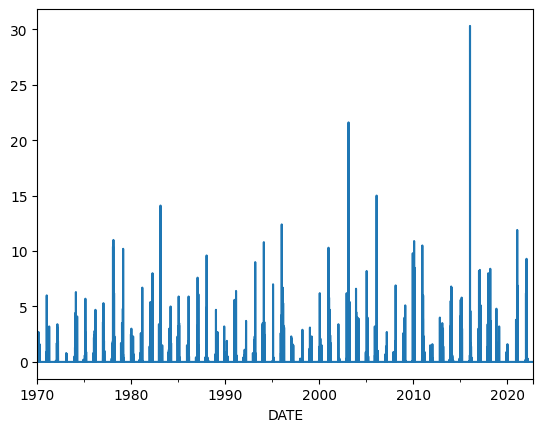

In [14]:
df['snow'].plot();

In [15]:
df['target'] = df.shift(-1)['tmax']
df

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [16]:
df.ffill(inplace = True)
df.isna().sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
target     0
dtype: int64

In [17]:
df.corr(numeric_only = True)

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.151051,0.001178,-0.007210,0.052279,-0.003358
snow,0.151051,1.000000,0.232567,-0.175075,-0.159285,-0.172737
snwd,0.001178,0.232567,1.000000,-0.259858,-0.256977,-0.241054
tmax,-0.007210,-0.175075,-0.259858,1.000000,0.955487,0.915296
tmin,0.052279,-0.159285,-0.256977,0.955487,1.000000,0.915461
target,-0.003358,-0.172737,-0.241054,0.915296,0.915461,1.000000


In [18]:
from sklearn.linear_model import Ridge

In [19]:
rr = Ridge(alpha = 0.1)

In [20]:
predictors = df.columns[~df.columns.isin(['station','name','target'])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

#### Note - We use backtesing in time-series data analysis rather than cross-validation.

In [21]:
def backtest(df, model, predictors, start = 3650, step = 90):
    all_predictions = []
    for i in range(start, df.shape[0], step):
        train = df.iloc[:i,:]
        test = df.iloc[i:(i+step),:]

        model.fit(train[predictors],train['target'])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)

        combined = pd.concat([test['target'], preds], axis=1)
        combined.columns = ['actual','prediction']
        combined['diff'] = (combined['actual']-combined['prediction']).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions, axis=0)

In [22]:
predictions = backtest(df, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771
2022-10-19,61.0,57.030435,3.969565


In [23]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions['actual'],predictions['prediction'])

5.13932667966084

In [24]:
def pct_diff(old, new):
    return (new-old)/old

def compute_rolling(df, horizon, col):
    label = f"rolling_{horizon}_{col}"

    df[label] = df[col].rolling(horizon).mean()
    df[f"{label}_pct"] = pct_diff(df[label], df[col])
    return df

rolling_horizon = [3]

for horizon in rolling_horizon:
    for col in ['tmax','tmin','prcp']:
        df = compute_rolling(df, horizon,col)

In [25]:
df

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct
DATE,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,51.000000,0.058824,0.026667,2.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,51.333333,-0.064935,0.026667,-1.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,0.026667,-1.0


In [26]:
df = df.iloc[2:,:].copy()

In [27]:
df.fillna(0, inplace = True)

In [28]:
df.isna().sum()

station               0
name                  0
prcp                  0
snow                  0
snwd                  0
tmax                  0
tmin                  0
target                0
rolling_3_tmax        0
rolling_3_tmax_pct    0
rolling_3_tmin        0
rolling_3_tmin_pct    0
rolling_3_prcp        0
rolling_3_prcp_pct    0
dtype: int64

In [29]:
def expand_mean(weather):
    return weather.expanding(1).mean()

for col in ['tmax','tmin','prcp']:
    df[f'month_avg_{col}'] = df[col].groupby(df.index.month, group_keys = False).apply(expand_mean)
    df[f'day_avg_{col}'] = df[col].groupby(df.index.day_of_year, group_keys = False).apply(expand_mean)

In [30]:
df.head()

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.00,38.000000,38.0,25.00,25.0,0.020000,0.02
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.00,34.500000,31.0,24.00,23.0,0.010000,0.00
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.00,34.666667,35.0,23.00,21.0,0.006667,0.00
1970-01-06,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.3,0.0,36,28,28.0,34.000000,0.058824,24.000000,0.166667,0.013333,2.00,35.000000,36.0,24.25,28.0,0.015000,0.04
1970-01-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,1.2,2.0,28,22,23.0,33.000000,-0.151515,23.666667,-0.070423,0.053333,1.25,33.600000,28.0,23.80,22.0,0.036000,0.12


In [31]:
predictors = df.columns[~df.columns.isin(['station','name','target'])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [32]:
predictions = backtest(df, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
1980-01-01,41.0,39.901376,1.098624
1980-01-02,36.0,42.220392,6.220392
1980-01-03,30.0,38.972281,8.972281
1980-01-04,29.0,33.336013,4.336013
1980-01-05,28.0,33.566910,5.566910
...,...,...,...
2022-10-17,58.0,66.785307,8.785307
2022-10-18,56.0,62.033404,6.033404
2022-10-19,61.0,59.142371,1.857629


In [33]:
mean_absolute_error(predictions['actual'],predictions['prediction'])

4.809827022133577

In [34]:
predictions['diff'].round().value_counts().sort_index()

diff
0.0     1113
1.0     2189
2.0     1972
3.0     1815
4.0     1571
5.0     1415
6.0     1196
7.0      991
8.0      844
9.0      669
10.0     496
11.0     369
12.0     300
13.0     202
14.0     154
15.0      98
16.0      63
17.0      61
18.0      36
19.0      22
20.0      17
21.0      17
22.0      10
23.0       8
24.0       1
25.0       2
26.0       1
27.0       1
28.0       1
30.0       1
Name: count, dtype: int64

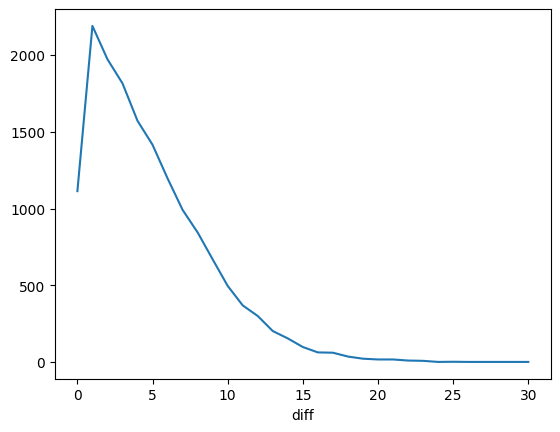

In [35]:
(predictions['diff'].round().value_counts().sort_index()).plot();

In [36]:
# Removing columns having collinearity less than 0.15

co = dict(df.corr(numeric_only=True)['target'])
del co['target']

li = []
for i in co:
    if (co[i] > 0.15):
        li.append(i)
li

['tmax',
 'tmin',
 'rolling_3_tmax',
 'rolling_3_tmin',
 'month_avg_tmax',
 'day_avg_tmax',
 'month_avg_tmin',
 'day_avg_tmin']

In [37]:
columns_keep = ['name', 'station', 'tmax','tmin', 'rolling_3_tmax', 'rolling_3_tmin', 'month_avg_tmax', 'day_avg_tmax', 'month_avg_tmin',
                             'day_avg_tmin', 'target']
df = df[columns_keep].copy()
df.tail()

,name,station,tmax,tmin,rolling_3_tmax,rolling_3_tmin,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,target
DATE,,,,,,,,,,,
2022-10-17,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,67,54,67.000000,51.000000,64.843462,63.490566,50.225905,48.962264,58.0
2022-10-18,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,58,48,63.666667,51.333333,64.839264,63.962264,50.224540,48.943396,56.0
2022-10-19,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,56,43,60.333333,48.333333,64.833844,62.056604,50.220110,48.132075,61.0
2022-10-20,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,61,44,58.333333,45.000000,64.831495,62.660377,50.216299,48.471698,64.0
2022-10-21,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,64,43,60.333333,43.333333,64.830986,63.471698,50.211880,47.867925,64.0


In [38]:
predi = df.columns[~df.columns.isin(['name','station','target'])]
a = backtest(df, rr, predi)
mean_absolute_error(a['actual'], a['prediction'])

4.82687893930483

#### For next 7 days prediction

In [39]:
def date_decide(last_date, no_of_days):
    days = [last_date + datetime.timedelta(i) for i in range(1, no_of_days+1)]
    return pd.DataFrame({'DATE': days})

last_date = df.index[-1]
future_df = date_decide(last_date, 7)
future_df.set_index('DATE', inplace=True)
future_df

""
DATE
2022-10-22
2022-10-23
2022-10-24
2022-10-25
2022-10-26
2022-10-27
2022-10-28


In [40]:
# Initialize new columns in future_df
for col in predi:
    future_df[col] = np.nan

# Function to generate future predictions
def future_preds(new_df, predictions, horizon):
    temp_df = df.tail(horizon).copy()  # Copy the last 'horizon' rows for rolling calculations
    temp_df.drop(['station', 'name', 'target'], axis=1, inplace=True)
    
    for i in range(len(new_df)):
        for col in predictions:
            rolling_mean = temp_df[col].rolling(horizon).mean().iloc[-1]  # Calculate rolling mean
            
            new_df[col].iloc[i] = rolling_mean  # Update new_df with the rolling mean
            
            # Add the new value to temp_df for the next rolling calculation
            next_index = new_df.index[i]
            temp_df.loc[next_index] = temp_df.iloc[-1].copy()
            temp_df.at[next_index, col] = rolling_mean

# Generate future predictions
future_preds(future_df, predi, 3)

C:\Users\Ps199\AppData\Local\Temp\ipykernel_8404\3452659753.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_df[col].iloc[i] = rolling_mean  # Update new_df with the rolling mean
C:\Users\Ps199\AppData\Local\Temp\ipykernel_8404\34526

In [41]:
future_df

,tmax,tmin,rolling_3_tmax,rolling_3_tmin,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin
DATE,,,,,,,,
2022-10-22,60.333333,43.333333,59.666667,43.888889,64.831156,63.201258,50.213353,48.069182
2022-10-23,61.777778,43.222222,59.888889,43.703704,64.831099,63.291405,50.212862,48.002096
2022-10-24,62.037037,43.259259,59.814815,43.765432,64.831118,63.261356,50.213026,48.024458
2022-10-25,61.382716,43.246914,59.839506,43.744856,64.831112,63.271372,50.212971,48.017004
2022-10-26,61.732510,43.251029,59.831276,43.751715,64.831114,63.268033,50.212989,48.019489
2022-10-27,61.717421,43.249657,59.834019,43.749428,64.831113,63.269146,50.212983,48.018661
2022-10-28,61.610882,43.250114,59.833105,43.750191,64.831113,63.268775,50.212985,48.018937


In [42]:
preds = rr.predict(future_df)
preds = pd.Series(preds, index = future_df.index)
future_df['target'] = preds
future_df

,tmax,tmin,rolling_3_tmax,rolling_3_tmin,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,target
DATE,,,,,,,,,
2022-10-22,60.333333,43.333333,59.666667,43.888889,64.831156,63.201258,50.213353,48.069182,61.131948
2022-10-23,61.777778,43.222222,59.888889,43.703704,64.831099,63.291405,50.212862,48.002096,61.613612
2022-10-24,62.037037,43.259259,59.814815,43.765432,64.831118,63.261356,50.213026,48.024458,61.691974
2022-10-25,61.382716,43.246914,59.839506,43.744856,64.831112,63.271372,50.212971,48.017004,61.482684
2022-10-26,61.732510,43.251029,59.831276,43.751715,64.831114,63.268033,50.212989,48.019489,61.594921
2022-10-27,61.717421,43.249657,59.834019,43.749428,64.831113,63.269146,50.212983,48.018661,61.590249
2022-10-28,61.610882,43.250114,59.833105,43.750191,64.831113,63.268775,50.212985,48.018937,61.555822


In [43]:
# Saving model
pickle.dump(rr, open('rr_model.sav', 'wb'))

In [44]:
df.to_csv("Dataset/Weather_mod_dataset.csv")